## Exploratory Data Analysis


Based on Practical Statistics for Data Scientists

#### Tipos de dados

#### Numéricos (Quantitativos)
Apropriado para contas

- **Continuous**: Escala célsius, velocidade do vento, velocidade do giro de um ventilador.
- **Discrete**: Número de banheiros em um casa, número de gatos de uma famíla. Contagem


#### Categóricos (Qualitativos)
Usado para agrupar
- **Categorical (nominal)**: eletrodomésticos numa casa: tv -> 1, microondas -> 2, forno-elétrico -> 3, geladeira -> 4...
- **Ordinal**: graus de uma queimadura: primeiro grau, segundo grau, terceiro grau. Classe social: primeira, segunda e terceira classes.
- **Binary**: genero: F (0) ou M (1) , True ou False: Cancer (1) ou não cancer (0), ligado ou desligado. 

#### População e Amostra (population | sample):
Um mesmo dataset pode ser a população de interesse ou uma amostra.

Exemplo:
dataset de notas de alunos de uma sala de aula de 1º ano do ensino fundamental.

- População: o grupo inteiro de interesse.
   letra grega
   parâmetro: sumário numérico

- Amostra: um subgrupo da população.
    letra do latim
    estatística: sumário numérico
    

#### Tipos de Estatística mais comuns:
**Descritiva**: Descreve os dados sem se preocupar com previsões futuras.

**Inferencial**: Se preocupa com previsões futuras.



##### Outliers: Valor que distoa absurdamente da maioria dos outros valores.
- Encontrou outlier: identifica o que é esse outlier
    - Dado real, verdadeiro. 
    - Typo: É necessário corrigir. Se não for possível, pode ser interessante deletar.


### 1. Medidas de tendência central
Estimativa de onde a maior parte dos nossos dados se encontra.

##### Mean
Soma de todos os valores dividido pela quantidade de valores.
Estimativa não-robusta.

Sensível a outliers.

- Para dados contínuos
- Para conjuntos sem outliers
- Para conjuntos de dados que seguem a distribuição normal

In [1]:
import numpy as np
import pandas as pd


x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [1, 2, 3, 4, 5, 6, 7, 8, 1000]

pd.DataFrame({
    "vector": ["x", "y"],
    "mean": np.round([np.mean(x), np.mean(y)], 2)
})



,vector,mean
0,x,4.50
1,y,115.11


##### Weighted Mean
Mutiplicamos os valores pelo seus respectivos pesos e dividimos pela soma dos pesos.

Estimativa não-robusta, *porém podemos colocar pesos menores para outliers e pesos maiores para não outliers e assim ter algo menos sensível a outliers.

- Para dados contínuos
- Para conjuntos sem outliers*
- Para conjuntos de dados que seguem a distribuição normal

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
weights = [1, 1, 0.90, 1, 4, 2, 1, 0.1]

np.average(x, weights=weights)

4.5

##### Trimmed Mean
Remove dos extremos uma porcentagem dos nossos dados. E calcula normalmente a média.

- Robusta
- Para dados contínuos

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.029194018355714765

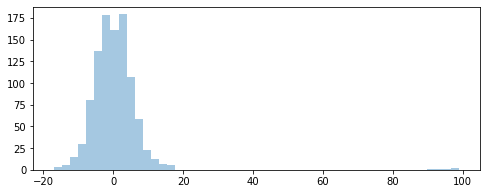

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

fig, ax = plt.subplots(figsize=(8, 3))

x = np.union1d(np.random.normal(0, 5, 1000), np.linspace(90, 99, 5))

sns.distplot(x, kde=False);

scp.stats.trim_mean(x, .05)

##### Median
Quando o dataset tem número ímpar de valores, a mediana é o valor central quando o conjunto está ordenado.
Quando o dataset tem número par de valores, a mediana é a média dos dois valores centrais quando o conjunto está ordenado.

- Robusta
- Dados contínuos
- Conjuntos com distribuição de qualquer tipo

In [4]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 90000000]

print(np.median(x))

5.0


##### Weighted Median
- Robusta contra outliers

##### Moda
Valor mais frequente num conjunto de dados

- Dados categóricos.
- Faz sentido para dados contínuos quando apresentamos a faixa modal.

### 2. Medidas de dispersão

Motivação:

In [5]:
distrib_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8]
distrib_2 = [2.3, 3.2, 3.8, 4.2, 5.7, 9.0]
distrib_3 = [-1000, -10, 4, 90, 100]

In [6]:
print(np.median(distrib_1))
print(np.median(distrib_2))
print(np.median(distrib_3))

4.0
4.0
4.0


Utilizamos ara verificar a variabilidade dos dados de um conjunto de dados.

##### Range
Subtrai o valor mais baixo do valor mais alto.

- Não é robusto, ou seja, é sensível aos outliers

In [7]:
print(np.max(distrib_1) - np.min(distrib_1))
print(np.max(distrib_2) - np.min(distrib_2))
print(np.max(distrib_3) - np.min(distrib_3))

8
6.7
1100


##### IQR - Inter-Quartil Range
Intervalo entre o terceiro quantil e o primeiro quartil.

3rd Quartil - 1st Quartil

- Mais robusto contra outliers

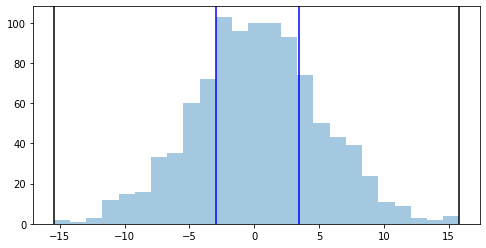

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.random.normal(0, 5, 1000)

sns.distplot(x, kde=False)

ax.axvline(np.percentile(x, 0), color="black")
ax.axvline(np.percentile(x, 25), color="blue")
ax.axvline(np.percentile(x, 75), color="blue")
ax.axvline(np.percentile(x, 100), color="black");

In [9]:
np.random.seed(42)

x = np.random.normal(0, 5, 1000)
iqr_x = np.round(np.percentile(x, 75) - np.percentile(x, 25), 2)
print("{:<30}{:>5}".format("IQR ~Normal(mean=0, std=5)", iqr_x))

y = np.random.normal(0, 15, 1000)
iqr_y = np.round(np.percentile(y, 75) - np.percentile(y, 25), 2)
print("{:<30}{:>5}".format("IQR ~Normal(mean=0, std=15)", iqr_y))

IQR ~Normal(mean=0, std=5)     6.48
IQR ~Normal(mean=0, std=15)   20.03


##### Variance
A média da distância ao quadrado de cada um dos valores do conjunto de dados da média do conjunto de dados.

- Calcular média do conjunto de dados.
- Soma dos quadrados das diferenças entre cada um dos valores e a média da distribuição.
- Dividir a soma pelo número de elementos no conjunto de dados


- Não robusta
- As unidades de medida ao quadrado

In [10]:
x = [10, 50, 100]

print(np.var(x))

1355.5555555555554


##### Standard Deviation
A média da distância de cada um dos valores do conjunto de dados da média do conjunto de dados.

Raíz quadrada da variância.

- Não robusta
- As unidades de medida originais

Pode usar o mesmo conceito da trimmed mean -> sumário numérico mais robusto

In [11]:
x = [10, 50, 100]

print(np.std(x))

36.81787005729087


##### Median Absolute Deviation (MAD)
Mediana da diferença entre cada um dos valores do conjunto de dados e a mediana do conjunto de dados.

- Robusta

In [12]:
import statsmodels.api as sm

x = [10, 50, 100]
y = [-100, 10, 50, 100, 1000, 9999999999]

pd.DataFrame({
    "VECTOR": ["x", "y"], 
    "MAD": np.round([sm.robust.scale.mad(x), sm.robust.scale.mad(y)], 2), 
    "STD": np.round([np.std(x), np.std(y)], 2)})

,VECTOR,MAD,STD
0,x,59.30,3.682000e+01
1,y,177.91,3.726780e+09


#### Exercícios

In [13]:
n_records = 500

patients = pd.DataFrame({
    "age": np.random.choice(np.arange(25, 40), size=n_records, replace=True),
    "gender": ["F" if x > .5 else "M" for x in np.random.random(n_records)],
    "height": np.round(np.random.normal(170, 4, n_records), 2),
    "blood group": np.random.choice(["A", "B", "AB", "O"], size=n_records, replace=True),
    "feeling_happy": np.random.choice(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], size=n_records, replace=True),
    "number_of_children": np.random.choice(np.arange(0, 5), size=n_records, p=[.33, .27, .21, .1, .09]),
    "smoke": np.random.choice([True, False], size=n_records, p=[.3, .7]),
    "social_class": np.random.choice([1, 2, 3], size=n_records, p=[.1, .35, .55])
})

patients.sample(10)

,age,gender,height,blood group,feeling_happy,number_of_children,smoke,social_class
371,34,M,175.09,AB,Neutral,2,False,2
452,36,F,169.63,A,Disagree,1,True,2
211,35,M,173.38,AB,Strongly Agree,1,False,3
482,26,F,169.62,A,Strongly Disagree,2,False,3
123,36,M,166.48,AB,Agree,1,False,2
194,38,F,169.62,B,Neutral,1,False,2
477,36,M,174.88,O,Agree,0,False,2
298,35,F,168.20,A,Strongly Disagree,4,True,1
3,35,F,169.97,B,Agree,2,False,3
80,29,F,165.93,AB,Disagree,0,True,3


#### 1. Quais das variáveis acima são:
- Quantitativas (numéricas):
- Qualitativas (categóricas):


- Contínuas:
- Discretas:


- Ordinais:
- Nominais:
- Binárias:

#### 2. Para as medidas de tendência central abaixo, quais os tipos de dados são mais apropriados?

- Mean
- Median
- Mode

#### 3. Traga 2 exemplos diferentes dos que já vimos para cada 1 dos 5 tipos de dados que vimos:
- Numérico contínuo:
- Numérico discreto:
- Categórico ordinal:
- Categórico nominal:
- Categórico binário:

### 3. Explorando a distribuição dos dados
Cada uma das estimativas apresentadas somam os dados em um único número para descrever a posição ou variabilidade. É importante também explorar como os dados estão distribuídos.

In [16]:
import os

pop = pd.read_csv(os.path.join("..", '..', "data", "gapminder", "population_total.csv"))
murder = pd.read_csv(os.path.join("..", '..', "data", "gapminder", "murder_total_deaths.csv"))
lexp = pd.read_csv(os.path.join("..", '..', "data", "gapminder", "life_expectancy_years.csv"))
pib = pd.read_csv(os.path.join("..", '..', "data", "gapminder", "income_per_person_gdppercapita_ppp_inflation_adjusted.csv"))

pop = pop.melt(id_vars="country", var_name="year", value_name="population")
murder = murder.melt(id_vars="country", var_name="year", value_name="murder")
lexp = lexp.melt(id_vars="country", var_name="year", value_name="life_expectancy")
pib = pib.melt(id_vars="country", var_name="year", value_name="pib")

df = pop.merge(murder, on=["country", "year"], how="outer")
df = df.merge(lexp, on=["country", "year"], how="outer")
df = df.merge(pib, on=["country", "year"], how="outer")

df_2020 = df[(df["year"] == "2020")].copy()
df_2020.head()

,country,year,population,murder,life_expectancy,pib
42900,Afghanistan,2020,38900000,NaN,64.4,1800.0
42901,Albania,2020,2880000,NaN,78.6,13200.0
42902,Algeria,2020,43900000,NaN,78.3,14000.0
42903,Andorra,2020,77300,NaN,NaN,55000.0
42904,Angola,2020,32900000,NaN,65.4,5440.0


##### Boxplots

Boxplots são baseados em percentis e dão uma rápida noção da distribuição dos dados.
Por padrão, os *whiskers* vão aos pontos mais distantes das caixas, exceto que esses pontos excedam 1.5*IQR. Excedendo os whiskers, os pontos são considerados outliers.

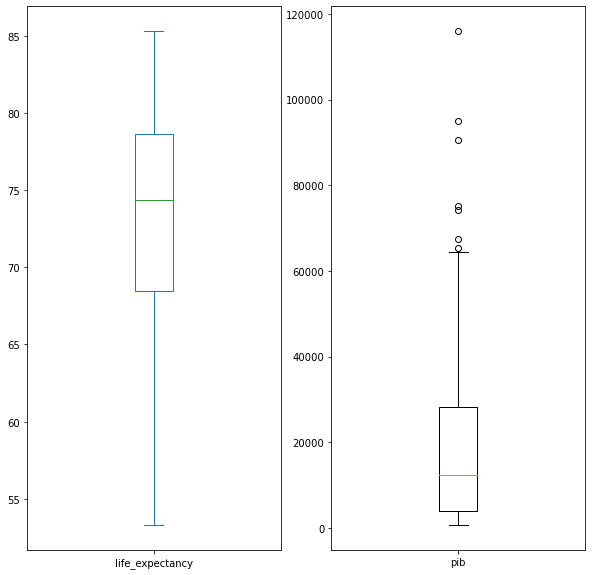

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

df_2020["life_expectancy"].plot(kind="box", ax=ax1)

ax2.boxplot(df_2020["pib"].dropna())
ax2.set_xticklabels(["pib"]);

#### Frequency Table

In [20]:
patients["feeling_happy"].value_counts()

Neutral              107
Agree                102
Strongly Agree       101
Strongly Disagree     96
Disagree              94
Name: feeling_happy, dtype: int64

In [21]:
binned_population = pd.cut(df_2020["population"].dropna(), bins=10)

binned_population.value_counts()

(-1439190.191, 144000728.1]     186
(144000728.1, 288000647.2]        6
(1296000080.9, 1440000000.0]      2
(288000647.2, 432000566.3]        1
(432000566.3, 576000485.4]        0
(576000485.4, 720000404.5]        0
(720000404.5, 864000323.6]        0
(864000323.6, 1008000242.7]       0
(1008000242.7, 1152000161.8]      0
(1152000161.8, 1296000080.9]      0
Name: population, dtype: int64

#### Histogram
Falar sobre diferença entre Histograma e Percentis (Boxplot)

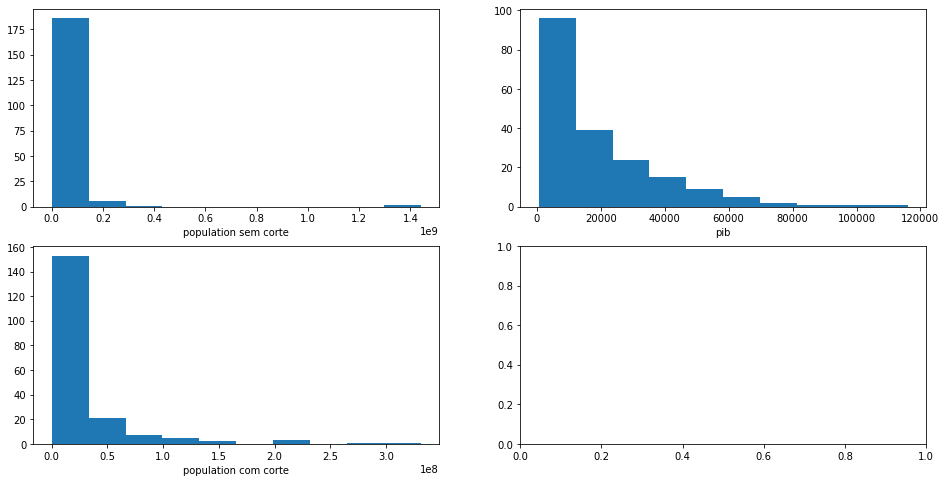

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax1, ax2, ax3, ax4 = ax.flat

ax1.hist(df_2020["population"].dropna(), bins=10)
ax1.set_xlabel("population sem corte")

ax2.hist(df_2020["pib"].dropna(), bins=10)
ax2.set_xlabel("pib")


ax3.hist(df_2020[df_2020["population"] < 0.6e9]["population"].dropna(), bins=10)
ax3.set_xlabel("population com corte"); 

Na teoria estatística, medidas de tendência central e dispersão são referidas como primeiro e segundo momentos da distribuição.

O terceiro e quarto momentos são chamados `skewness` e `kurtosis`. Geralmente, não se usa medidas para esses momentos, mas visualizações.

#### Density Estimates
Funcionam como "suavizadores" dos histogramas. Entretanto, o eixo Y não mostra a quantidade de registros em cada bin, mas sua proporção.

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


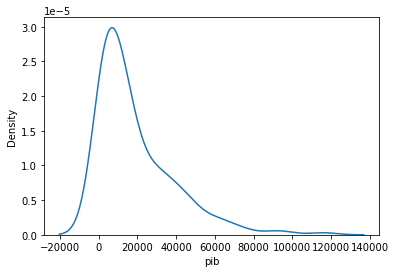

In [22]:
sns.distplot(df_2020["pib"].dropna(), kde=True, hist=False);

### 4. Explorando dados categóricos e binarios
Para dados categóricos, proporções ou porcentagens ajudam a contar a história dos dados.

Ter um sumário de variável binária ou categórica de poucos labels é fácil. Precisamos verificar a proporção de 1's ou das labels importantes.

In [24]:
patients.head()

,age,gender,height,blood group,feeling_happy,number_of_children,smoke,social_class
0,38,F,172.61,B,Neutral,1,False,3
1,39,M,165.45,A,Strongly Agree,2,True,3
2,30,F,169.19,O,Neutral,4,True,2
3,35,F,169.97,B,Agree,2,False,3
4,27,M,172.40,A,Agree,2,False,3


#### Mean (for Binary)

In [25]:
np.round(patients["smoke"].mean() * 100, 2)

32.8

In [26]:
print("Temos {}% de pacientes fumantes".format(np.round(100 * patients["smoke"].mean(), 2)))

Temos 32.8% de pacientes fumantes


In [27]:
patients.replace({
    "gender": {
        "F": 1,
        "M": 0,
    }
}, inplace=True)

patients.head()

,age,gender,height,blood group,feeling_happy,number_of_children,smoke,social_class
0,38,1,172.61,B,Neutral,1,False,3
1,39,0,165.45,A,Strongly Agree,2,True,3
2,30,1,169.19,O,Neutral,4,True,2
3,35,1,169.97,B,Agree,2,False,3
4,27,0,172.40,A,Agree,2,False,3


In [28]:
patients["gender"].mean()

0.496

In [29]:
print("A coluna PIB do dataframe tem {}% dos valores nulos".format(np.round(df["pib"].isna().mean() * 100, 2)))

A coluna PIB do dataframe tem 20.75% dos valores nulos


#### Mode

In [30]:
patients["blood group"].mode()

0    O
dtype: object

#### Barplot

Diferença em relação ao histograma

In [31]:
class_prop = (patients["social_class"].value_counts() / patients["social_class"].shape[0])
class_prop

3    0.544
2    0.338
1    0.118
Name: social_class, dtype: float64

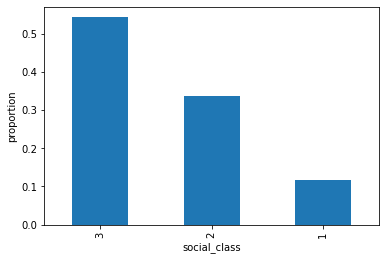

In [34]:
class_prop = patients["social_class"].value_counts(normalize=True)

ax = class_prop.plot(kind="bar")

ax.set_xlabel("social_class")
ax.set_ylabel("proportion");

#### Expected Value
Usada quando uma variável categórica pode ser mapeada para valores discretos (de uma mesma escala).

- NAN = \$0 / month
- Plano I = \$50 / month
- Plano II = \$300 / month

In [35]:
np.random.seed(42)

webinar = pd.DataFrame({
    "attendee_id": np.random.choice(np.arange(1_000_000, 9_999_999), size=200, replace=False),
    "chosen_subscription_plan": np.random.choice([np.nan, "I", "II"], size=200, replace=True, p=[.8, .15, .05])
})

webinar

,attendee_id,chosen_subscription_plan
0,2661066,nan
1,3848565,I
2,5801449,nan
3,1041736,nan
4,9545653,I
...,...,...
195,4897701,I
196,4888411,nan
197,6017520,nan
198,8699483,nan


In [37]:
proportions = webinar.chosen_subscription_plan.value_counts(normalize=True)
proportions

nan    0.780
I      0.135
II     0.085
Name: chosen_subscription_plan, dtype: float64

In [38]:
ev = (0 * proportions[0]) + (50 * proportions[1]) + (300 * proportions[2])

print("Expected Value by attendee ${} / month ".format(ev))

Expected Value by attendee $32.25 / month 


In [39]:
1000 * ev

32250.0

### 5. Correlação


##### Pearson's Correlation Coefficient
Medida de associação linear de variáveis numéricas. [-1, 1]

Outras correlation coefficients: Spearman's rho e Kendall's tau (correlação entre o rank dos dados. São mais robustas aos outliers e podem lidar com certos tipos de não-linearidade).

Data Scientists geralmente se mantém ao coeficiente de Pearson para análise de dados.

|Absolute Value of r|Strength of Relationship|
|---|---|
|r < 0.3|None or very weak|
|0.3 < r < 0.5| Weak|
|0.5 < r < 0.7| Moderate|
|r > 0.7| Strong|

<AxesSubplot:>

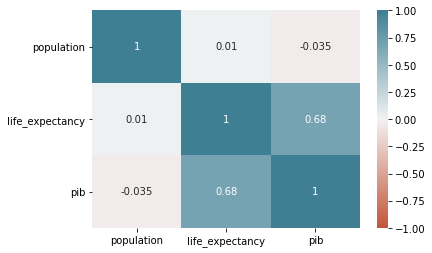

In [41]:
sns.heatmap(df_2020[["population", "life_expectancy", "pib"]].corr(), 
            vmin=-1, vmax=1, 
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True)

In [43]:
patients[["age", "number_of_children"]].corr()

,age,number_of_children
age,1.000000,-0.023128
number_of_children,-0.023128,1.000000


#### Scatterplot

<AxesSubplot:xlabel='population', ylabel='life_expectancy'>

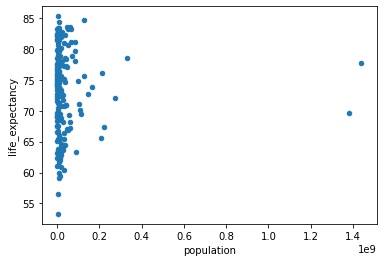

In [44]:
df_2020.plot(x="population", y="life_expectancy", kind="scatter")

#### Scatterplot Matrix

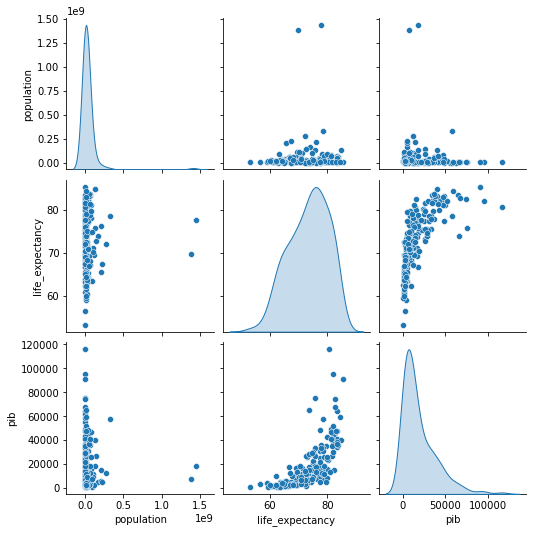

In [46]:
sns.pairplot(df_2020[["population", "life_expectancy", "pib"]], diag_kind="kde");

### 6. Explorando 2 ou mais variáveis

#### 6.1 Numeric vs Numeric
- Scatterplot
- Hexbin
- Countour plot

In [47]:
df_2020_no_india_no_china = df_2020[df_2020["population"] < 0.8e9]

<AxesSubplot:xlabel='population', ylabel='life_expectancy'>

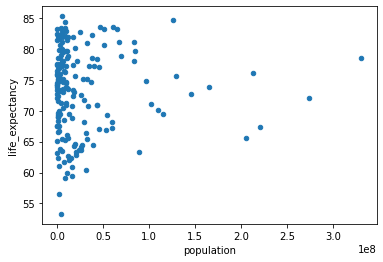

In [48]:
df_2020_no_india_no_china.plot(x="population", y="life_expectancy", kind="scatter")

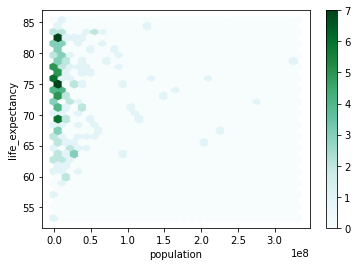

In [49]:
df_2020_no_india_no_china.plot(x="population", y="life_expectancy", kind="hexbin", gridsize=30, sharex=False);

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population', ylabel='life_expectancy'>

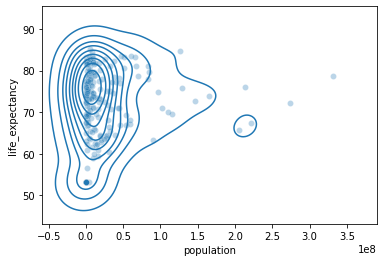

In [50]:
sns.scatterplot(df_2020_no_india_no_china["population"].fillna(809), df_2020_no_india_no_china["life_expectancy"].fillna(53.3), alpha=.3)
sns.kdeplot(df_2020_no_india_no_china["population"].fillna(809), df_2020_no_india_no_china["life_expectancy"].fillna(53.3))

#### Categorical vs Numeric
- Boxplot
- Violin plot
- Stripplot

In [51]:
def year_to_decade(row):
    year = int(row["year"])
    
    if 1991 <= year <= 2000:
        return "2000"
    elif 2001 <= year <= 2010:
        return "2010"
    elif 2011 <= year <= 2020:
        return "2020"
    else:
        return "xx"

df["decade"] = df.apply(year_to_decade, axis=1)
df_decades = df[df["decade"] != "xx"].copy()

df_group_decades = df_decades.groupby(["decade", "country"]).agg({
    "population": "max",
    "murder": "max",
    "life_expectancy": "mean",
    "pib": "max"
}).reset_index(drop=False)

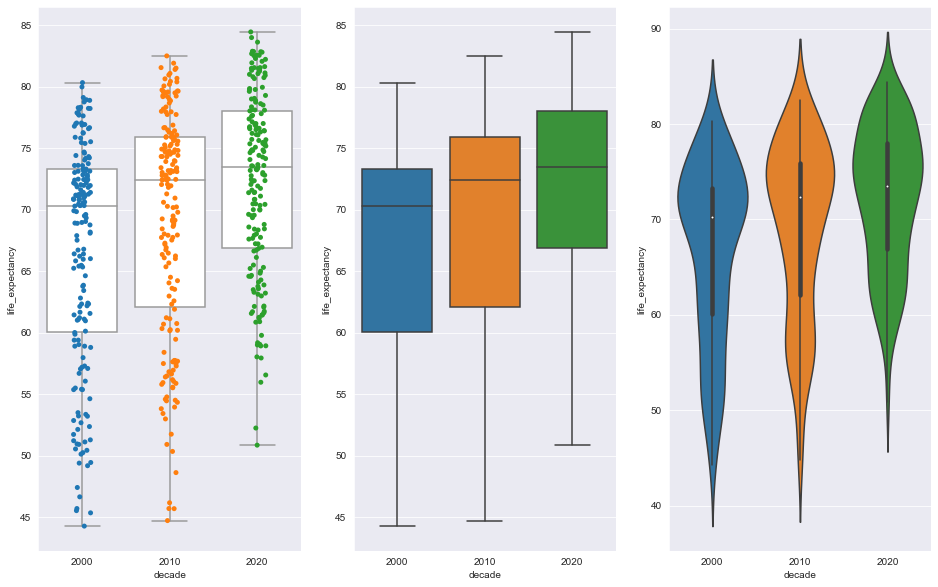

In [52]:
sns.set_style("darkgrid")

fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 10))

sns.boxplot(x="decade", y="life_expectancy", data=df_group_decades, color="white", ax=ax1)
sns.stripplot(x="decade", y="life_expectancy", data=df_group_decades, ax=ax1)
sns.boxplot(x="decade", y="life_expectancy", data=df_group_decades, ax=ax2)
sns.violinplot(x="decade", y="life_expectancy", data=df_group_decades, ax=ax3);

In [53]:
def status_pib(row):
    decade = row["decade"]
    pib = row["pib"]
    
    x = df_decades[df_decades["decade"] == decade]
    
    p1, p2 = np.percentile(df_decades["pib"].dropna(), [30, 80])
    
    if pib <= p1:
        return "pobretao"
    elif pib <= p2:
        return "mais ou menos"
    else:
        return "endinheirado"
        

df_group_decades["status"] = df_group_decades.apply(status_pib, axis=1)

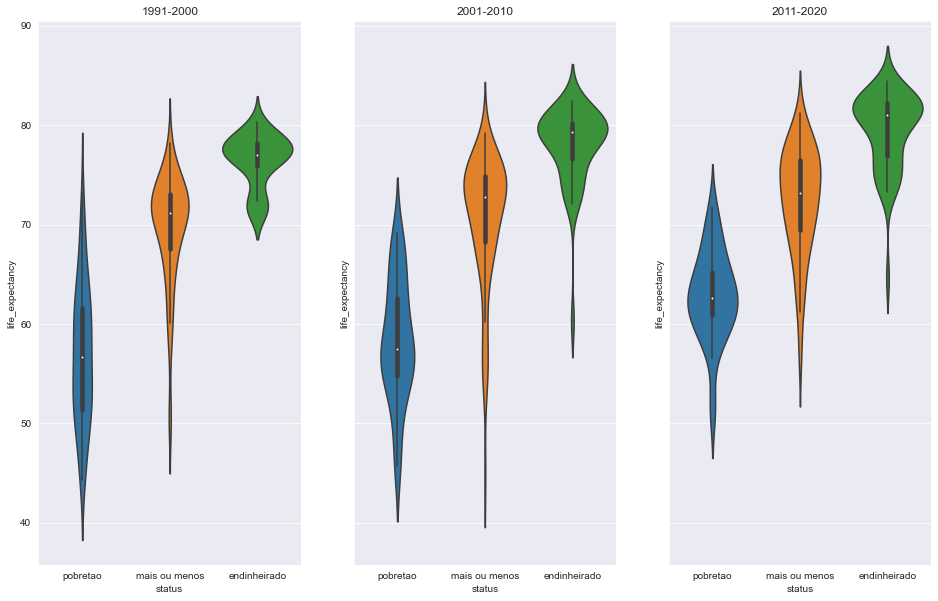

In [55]:
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 10), sharey=Truedf)

df_2000 = df_group_decades[df_group_decades["decade"] == "2000"]
df_2010 = df_group_decades[df_group_decades["decade"] == "2010"]
df_2020 = df_group_decades[df_group_decades["decade"] == "2020"]

sns.violinplot(x="status", y="life_expectancy", data=df_2000, ax=ax1)
sns.violinplot(x="status", y="life_expectancy", data=df_2010, ax=ax2)
sns.violinplot(x="status", y="life_expectancy", data=df_2020, ax=ax3)

ax1.set_title("1991-2000")
ax2.set_title("2001-2010")
ax3.set_title("2011-2020");

In [73]:
pivot_amt_status.columns.get_level_values(0)

Index(['new', 'new', 'new', 'totals'], dtype='object')

In [74]:
amt_status = df_group_decades.groupby(['decade']).agg(
    new=pd.NamedAgg(column="status", aggfunc="value_counts")
).reset_index()


pivot_amt_status = amt_status.pivot_table(index=['decade'], columns=['status'])
pivot_amt_status.columns = pivot_amt_status.columns.get_level_values(1)

pivot_amt_status['totals'] = pivot_amt_status.apply(lambda row: np.sum(row), axis=1)
pivot_amt_status


# sns.heatmap(, annot=True)

status,endinheirado,mais ou menos,pobretao,totals
decade,,,,
2000,37,96,62,195
2010,47,98,50,195
2020,53,104,38,195


#### Categorical vs Categorical

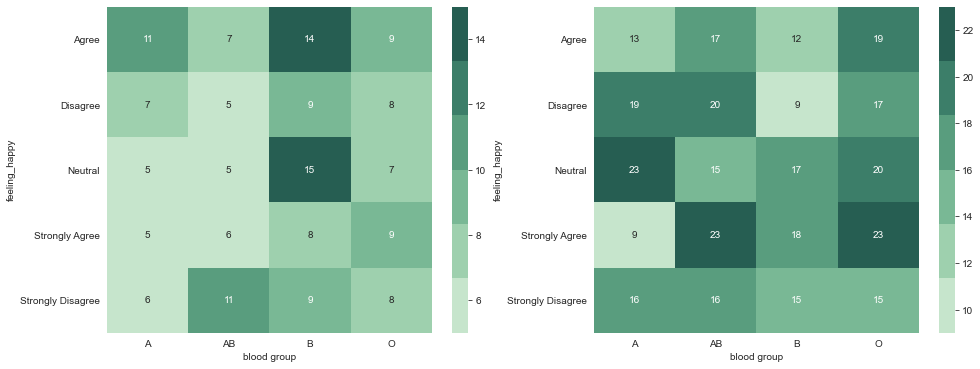

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

cb_1 = pd.crosstab(index=patients.query("smoke == True")["feeling_happy"], columns=patients.query("smoke == True")["blood group"])
cb_2 = pd.crosstab(index=patients.query("smoke == False")["feeling_happy"], columns=patients.query("smoke == False")["blood group"])

sns.heatmap(cb_1, cmap=sns.color_palette("ch:2.5, -.2, dark=.3"), ax=ax1, annot=True)
sns.heatmap(cb_2, cmap=sns.color_palette("ch:2.5, -.2, dark=.3"), ax=ax2, annot=True);